In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from calc_distance import get_data, distance, smooth
from scipy import stats

In [87]:
running_data = []

In [88]:
for filename in os.listdir(os.getcwd()):
    if (filename[-4::] == '.gpx'):
        running_data.append(filename)

In [89]:
running_df = pd.DataFrame(data=running_data, columns=['filename'])
running_df

,filename
0,RK_gpx _2017-05-27_1631.gpx
1,RK_gpx _2017-05-28_1722.gpx
2,RK_gpx _2017-06-10_1653.gpx
3,RK_gpx _2017-06-11_1650.gpx
4,RK_gpx _2017-06-16_1719.gpx
5,RK_gpx _2017-06-19_1708.gpx
6,RK_gpx _2017-06-28_1827.gpx
7,RK_gpx _2017-07-03_2055.gpx
8,RK_gpx _2017-07-07_1620.gpx
9,RK_gpx _2017-07-08_1651.gpx


In [90]:
def get_distance(filename):
    points = get_data(filename)
    print('Unfiltered distance: %0.2f' % (distance(points),))
    smoothed_points = smooth(points)
    res = distance(smoothed_points)
    print('Filtered distance: %0.2f' % (distance(smoothed_points),))
    return res

In [91]:
get_distance = np.vectorize(get_distance)

In [92]:
running_df['distance'] = get_distance(running_df['filename'])

Unfiltered distance: 3871.82
Filtered distance: 3304.44
Unfiltered distance: 3871.82
Filtered distance: 3304.44
Unfiltered distance: 3134.74
Filtered distance: 2897.73
Unfiltered distance: 5052.79
Filtered distance: 4764.52
Unfiltered distance: 4388.99
Filtered distance: 3360.57
Unfiltered distance: 3847.82
Filtered distance: 3568.52
Unfiltered distance: 6035.81
Filtered distance: 5826.51
Unfiltered distance: 4123.43
Filtered distance: 3320.75
Unfiltered distance: 4574.46
Filtered distance: 4263.20
Unfiltered distance: 5028.56
Filtered distance: 4491.91
Unfiltered distance: 5351.77
Filtered distance: 5097.90
Unfiltered distance: 4733.38
Filtered distance: 4344.06
Unfiltered distance: 4839.61
Filtered distance: 4258.83
Unfiltered distance: 6369.84
Filtered distance: 5699.30


In [99]:
running_df = running_df.reset_index()

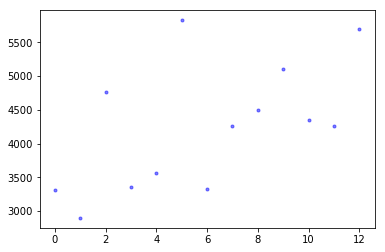

In [100]:
plt.plot(running_df['distance'], 'b.', alpha = 0.5)
plt.show()

In [112]:
fit = stats.linregress(running_df['index'],running_df['distance'])
fit.slope, fit.intercept

(137.2982447975196, 3422.2299531744939)

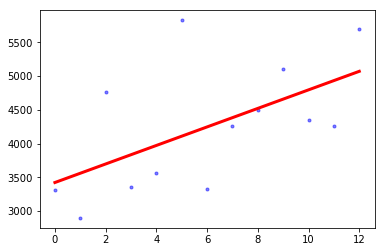

In [114]:
plt.figure()
plt.plot(running_df['distance'], 'b.', alpha = 0.5)
plt.plot(running_df['index']*fit.slope + fit.intercept, 'r-', linewidth=3)
plt.show()

In [115]:
print('The p-value is', fit.pvalue)

The p-value is 0.041006735584
